# SVM_MNIST_CLASSIC

In [ ]:
import numpy as np 
from classic_mnist import c_MNIST

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      1    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
6041    2
1677    5
4352    3
5212    3
1691    1
       ..
7422    1
2489    4
1941    7
8230    9
921     2
Name: label, Length: 3000, dtype: int64
Train: X=

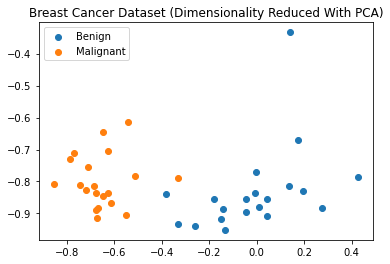

In [2]:
n = 2 # number of principal components kept
training_dataset_size = 20
testing_dataset_size = 10

X_train, X_test, y_train, Y_test = c_MNIST(training_dataset_size, testing_dataset_size, n)


In [3]:
print(Y_test)

4352     True
5212     True
8952     True
7252     True
5088    False
        ...  
4587    False
6334    False
7314    False
2952     True
1886    False
Name: label, Length: 603, dtype: bool


In [8]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


In [11]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))

accuracy: 0.9800995024875622 

[[280   5]
 [  7 311]]


In [15]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)


In [16]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))

accuracy: 0.9800995024875622 

[[280   5]
 [  7 311]]


In [18]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)



Let's now choose the best hyperparameters.


In [19]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9750915750915752 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}




Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.


In [21]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(Y_test, y_pred), "\n")
print(metrics.confusion_matrix(Y_test, y_pred), "\n")



accuracy 0.9701492537313433 

[[271  14]
 [  4 314]] 

